# <p style="background-color:#FFD580;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;display:block;">Arabic OCR</p>

In [2]:
from __future__ import division, print_function, absolute_import

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Flatten
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from PIL import Image
import cv2

In [3]:
batch_size=64
learning_rate = 0.01
epochs=50
num_classes=28


In [4]:
trainx = pd.read_csv("Data/Arabic Handwritten Characters Dataset CSV/csvTrainImages 13440x1024.csv",header=None)
trainy = pd.read_csv("Data/Arabic Handwritten Characters Dataset CSV/csvTrainLabel 13440x1.csv",header=None)

testx = pd.read_csv("../input/ahcd1/csvTestImages 3360x1024.csv",header=None)
testy = pd.read_csv("../input/ahcd1/csvTestLabel 3360x1.csv",header=None)

chars =list('ابتثجحخدذرزسشصضطظعغفقكلمنهوي')
chars

['ا',
 'ب',
 'ت',
 'ث',
 'ج',
 'ح',
 'خ',
 'د',
 'ذ',
 'ر',
 'ز',
 'س',
 'ش',
 'ص',
 'ض',
 'ط',
 'ظ',
 'ع',
 'غ',
 'ف',
 'ق',
 'ك',
 'ل',
 'م',
 'ن',
 'ه',
 'و',
 'ي']

In [5]:
X_train = []
y_train=list(trainy[0])
for i in range(len(trainx)):
    img = trainx.iloc[i,:].values.reshape(32,32,1)
    X_train.append(img)


In [6]:
X_test = []
y_test=list(testy[0])
for i in range(len(testx)):
    img = testx.iloc[i,:].values.reshape(32,32,1)
    X_test.append(img)

In [7]:
def display_images(X_train,row,col):
    fig = plt.figure(figsize=(12,12))
    ax = fig.subplots(row,col)
    for j in range(row):
        for i in range(col):
            fig.suptitle('Images')
            ax[j,i].imshow(X_train[random.randint(0,len(X_train))])
    plt.plot()

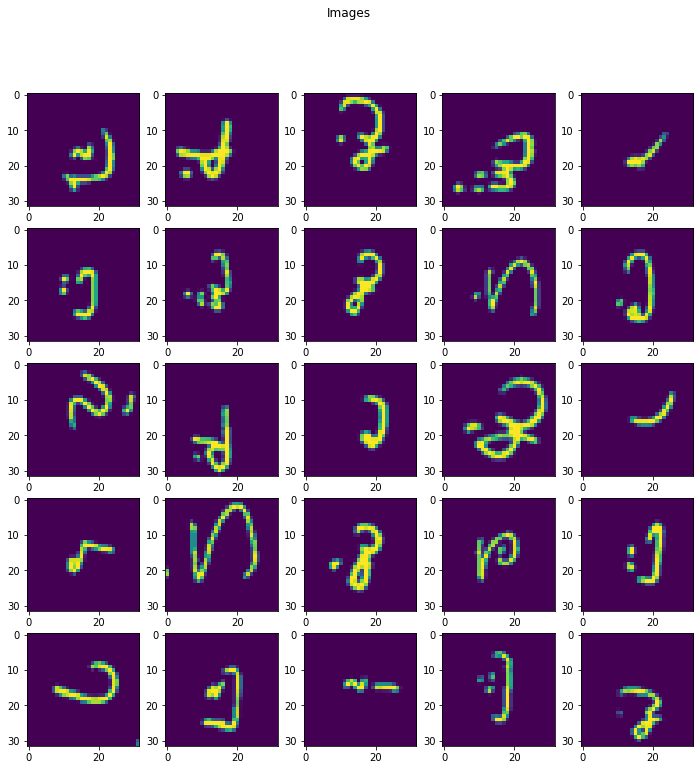

In [8]:
display_images(X_train,5,5)

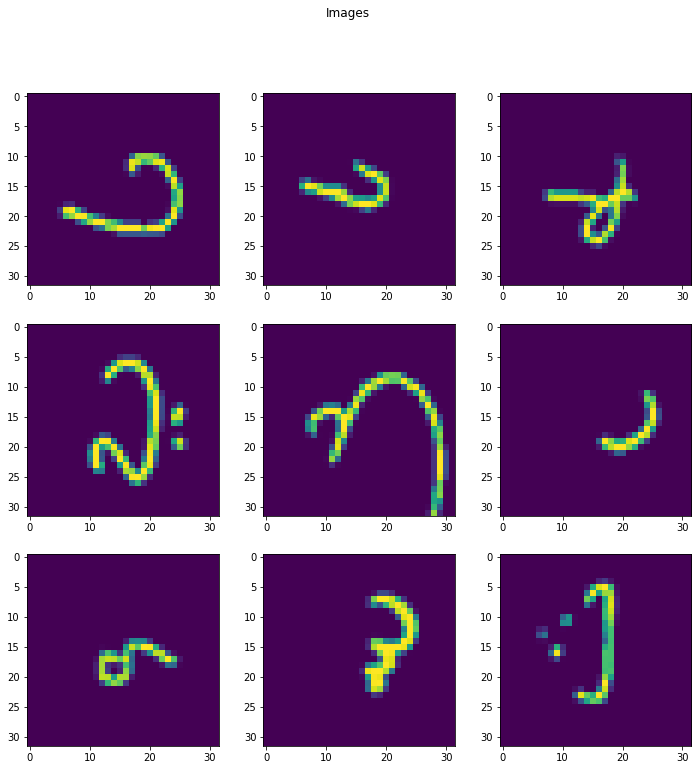

In [9]:
display_images(X_test,3,3)

In [10]:
def preprocess_data(train_data_x):
    train_data_x = train_data_x.to_numpy().reshape((train_data_x.shape[0], 32, 32)).astype('uint8')
    for i in range(len(train_data_x)):
        train_data_x[i] = cv2.rotate(train_data_x[i], cv2.ROTATE_90_CLOCKWISE)      # Rotating the images.
        train_data_x[i] = np.flip(train_data_x[i], 1)                               # Flipping the images
    train_data_x = train_data_x.reshape([-1, 32, 32, 1]).astype('uint8')          # Reshaping into the required size.
    train_data_x = train_data_x.astype('float32')/255                             # Here we normalize our images.
    return np.asarray(train_data_x)

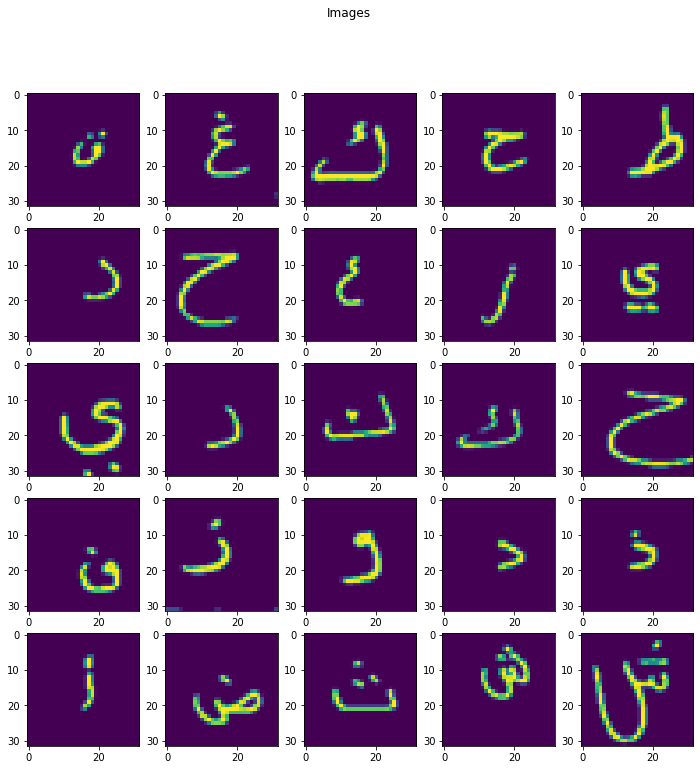

In [11]:
X_train =preprocess_data(trainx)
display_images(X_train,5,5)

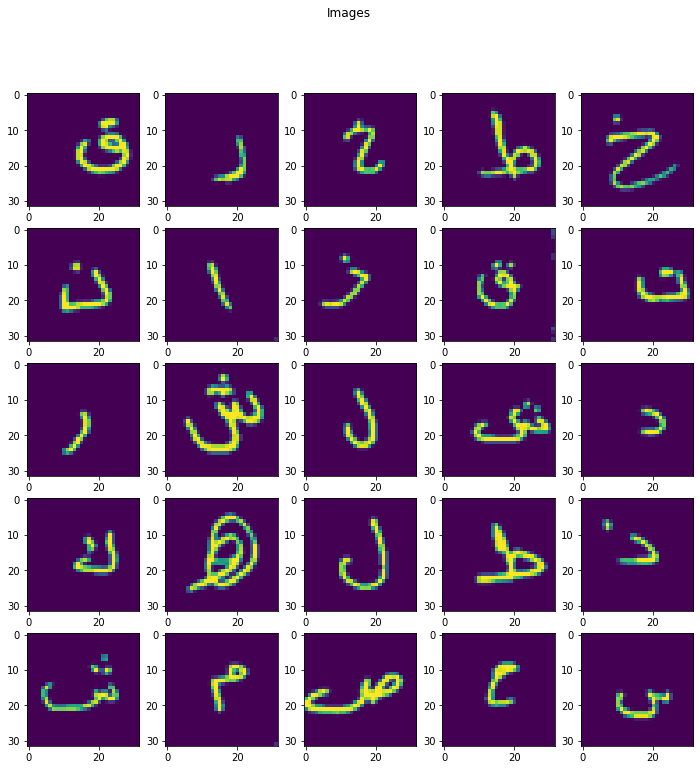

In [12]:
X_test =preprocess_data(testx)
display_images(X_test,5,5)

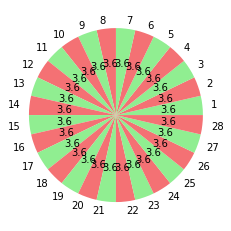

In [13]:
classes=np.unique(y_train)
plt.pie(trainy[0].value_counts(), labels=classes, colors=['#90EE91', '#F47174'], autopct='%1.1f')
plt.show()

# <p style="background-color:#FFD580;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;display:block;">Create an intialize the Model</p>

In [14]:


def create_model(activation='relu', optimizer='adam', kernel_initializer='he_normal'):  
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 1), activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32, activation= activation, kernel_initializer=kernel_initializer, kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(28, activation='softmax'))

    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

In [15]:
model = create_model()                                                          # Now we created an instance of a model with our custom architefture.
model.summary()                                                                 # Then we display our model's summary.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          2

2022-03-18 15:25:11.525428: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 15:25:11.534386: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 15:25:11.535155: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 15:25:11.536146: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [16]:
model = create_model(optimizer=tf.keras.optimizers.Adamax(0.001),
                     kernel_initializer='uniform',
                     activation='relu')

In [17]:
y_train = tf.keras.utils.to_categorical(np.array(y_train)- 1                # Returns an array of dimentions (13340, 28).
                         , num_classes=28)
y_test = tf.keras.utils.to_categorical(np.array(y_test)- 1                  # Returns an array of dimentions (3360, 28).
                        , num_classes=28)

In [18]:
history = model.fit(X_train,                                                    
                    y_train, 
                    validation_split= 0.3,
                    epochs=30,     
                    batch_size=64,)

2022-03-18 15:25:12.851151: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-03-18 15:25:13.869746: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


147/147 [==============================] - 3s 7ms/step - loss: 3.2354 - accuracy: 0.2314 - val_loss: 4.8219 - val_accuracy: 0.0357
Epoch 2/30
147/147 [==============================] - 1s 5ms/step - loss: 2.3656 - accuracy: 0.4622 - val_loss: 5.3112 - val_accuracy: 0.0357
Epoch 3/30
147/147 [==============================] - 1s 5ms/step - loss: 1.9031 - accuracy: 0.5967 - val_loss: 4.9768 - val_accuracy: 0.0357
Epoch 4/30
147/147 [==============================] - 1s 5ms/step - loss: 1.5506 - accuracy: 0.6890 - val_loss: 3.3328 - val_accuracy: 0.0759
Epoch 5/30
147/147 [==============================] - 1s 5ms/step - loss: 1.2845 - accuracy: 0.7553 - val_loss: 1.5002 - val_accuracy: 0.6964
Epoch 6/30
147/147 [==============================] - 1s 5ms/step - loss: 1.0554 - accuracy: 0.8078 - val_loss: 0.9575 - val_accuracy: 0.8495
Epoch 7/30
147/147 [==============================] - 1s 5ms/step - loss: 0.8941 - accuracy: 0.8388 - val_loss: 0.7690 - val_accuracy: 0.8748
Epoch 8/30
147/14

In [19]:
y_pred = model.predict(X_test)
print(classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1),target_names=chars))

              precision    recall  f1-score   support

           ا       0.96      0.99      0.98       120
           ب       1.00      0.99      1.00       120
           ت       0.88      0.96      0.92       120
           ث       0.99      0.93      0.96       120
           ج       1.00      0.91      0.95       120
           ح       0.89      0.98      0.93       120
           خ       0.98      0.94      0.96       120
           د       0.87      0.98      0.92       120
           ذ       0.92      0.90      0.91       120
           ر       0.94      0.98      0.96       120
           ز       0.97      0.89      0.93       120
           س       0.95      1.00      0.98       120
           ش       0.99      0.98      0.99       120
           ص       0.95      0.97      0.96       120
           ض       0.98      0.93      0.96       120
           ط       0.94      0.96      0.95       120
           ظ       0.97      0.94      0.95       120
           ع       0.92    

In [20]:
def display_images_result(X_train,row,col):
    fig = plt.figure(figsize=(12,12))
    ax = fig.subplots(row,col)
    for j in range(row):
        for i in range(col):
            fig.suptitle('Images')
            idx=random.randint(0,len(X_train))
            ax[j,i].imshow(X_train[idx])
            pred=model.predict(np.expand_dims(X_test[idx], axis=0))
            ax[j,i].set_title(chars[(np.argmax(pred,axis=1)[0])],fontdict={'fontsize':20,})
    plt.plot()

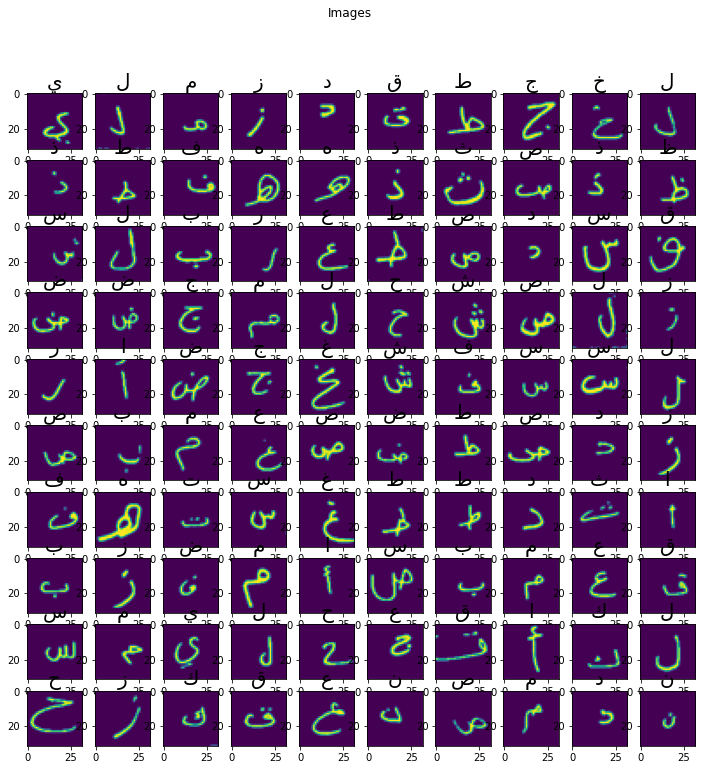

In [21]:
from matplotlib import rcParams
display_images_result(X_test,10,10)